In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import seaborn as sns
import altair as alt

In [2]:
short_term = pd.read_csv("./data/short_term.csv")

In [3]:
# descriptive statistics
print('Short-term mean (1.0x speed):', short_term[short_term.Speed == '1.0 speed (normal)']['SC0'].mean())
print('Short-term mean (1.5x speed):', short_term[short_term.Speed == '1.5x speed']['SC0'].mean())
print('Short-term mean (2.0x speed):', short_term[short_term.Speed == '2.0x speed']['SC0'].mean())

print('Standard deviation (1.0x speed):', short_term[short_term.Speed == '1.0 speed (normal)']['SC0'].std())
print('Standard deviation (1.5x speed):', short_term[short_term.Speed == '1.5x speed']['SC0'].std())
print('Standard deviation (2.0x speed):', short_term[short_term.Speed == '2.0x speed']['SC0'].std())



bar = alt.Chart(short_term).mark_bar().encode(
  x='Speed',
  y='mean(SC0)'
)

error_bars = alt.Chart(short_term).mark_errorbar().encode(
  x='Speed',
  y='mean(SC0)'
)

bar + error_bars

# Short-term mean (1.0x speed): 9.181818181818182
# Short-term mean (1.5x speed): 6.636363636363637
# Short-term mean (2.0x speed): 7.454545454545454
# Standard deviation (1.0x speed): 3.2807981290588977
# Standard deviation (1.5x speed): 2.73030134866931
# Standard deviation (2.0x speed): 2.5045413298101655

Short-term mean (1.0x speed): 9.181818181818182
Short-term mean (1.5x speed): 6.636363636363637
Short-term mean (2.0x speed): 7.454545454545454
Standard deviation (1.0x speed): 3.2807981290588977
Standard deviation (1.5x speed): 2.73030134866931
Standard deviation (2.0x speed): 2.5045413298101655


alt.LayerChart(...)

In [4]:
# assumption check - variances
pg.homoscedasticity(data=short_term, dv="SC0", group="Speed", method="levene", alpha=0.05)

# p > 0.05 so we can continue

,W,pval,equal_var
levene,0.585185,0.563235,True


In [5]:
# assumption check - normality
pg.normality(data=short_term, dv="SC0", group="Speed")

# p > 0.05 for all playback speeds so we can continue

,W,pval,normal
Speed,,,
2.0x speed,0.953100,0.683741,True
1.5x speed,0.953966,0.694880,True
1.0 speed (normal),0.897870,0.174074,True


In [6]:
# p > 0.05, so no significant results. no post-hoc tests
pg.anova(data=short_term, dv="SC0", between="Speed", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Speed,37.151515,2,18.575758,2.275427,0.120209,0.131715
1,Within,244.909091,30,8.163636,NaN,NaN,NaN


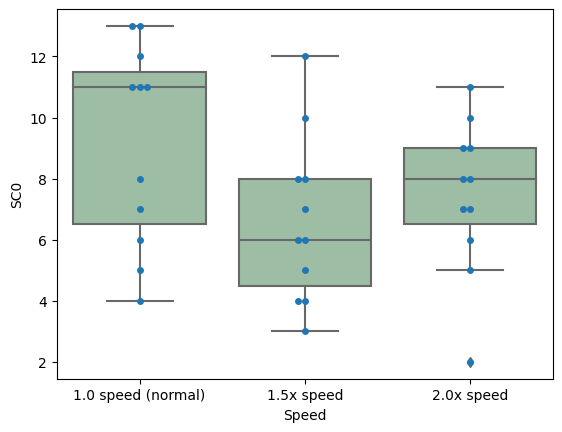

In [7]:
ax = sns.boxplot(x="Speed", y="SC0", data=short_term, color="#99c2a2")
ax = sns.swarmplot(x="Speed", y="SC0", data=short_term)
ax.invert_xaxis()
plt.show()